### Here we try to reproduce the arguments made in [Minka, 2002](https://tminka.github.io/papers/minka-bma-isnt-mc.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(0)

N = 20
X = np.random.uniform(low=-1, high=1, size=(N, 2))

theta = np.linspace(0, 2*np.pi, 100)
r = 0.5
h1 = r*np.cos(theta)
h2 = r*np.sin(theta)
centers = [np.array([0, 0.25]), np.array([-0.25, -0.25]), np.array([0.25, -0.25])]
H = [(h1 + x, h2 + y) for (x, y) in centers]
circles = [(center, r) for center in centers]

# This will be the function that computes the classification for each circle
def in_circle(x, circle):
    center, radius = circle
    return ((x - center) ** 2).sum(-1) <= radius ** 2

y = [in_circle(X, circle) for circle in circles]
y = (y[0] & y[1]) | (y[0] & y[2]) | (y[1] & y[2])

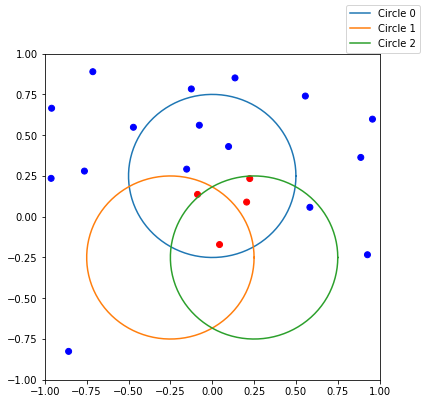

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(*X.T, c=y, cmap="bwr")
for i, (hx, hy) in enumerate(H):
    ax.plot(hx, hy, label=f"Circle {i}")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
fig.legend()

In [4]:
import math

# If we don't allow our hypotheses to misclassify points, then they will have zero likelihood
# Hence assume there is some noise to allow misclassification as follows:
# If the classifier is correct, then the probability of the classifier's output is (1-noise)
# Otherwise, the probability of the classifier's output is (noise)
# See explanation of equation 3 in Turning Bayesian Model Averaging Into Bayesian Model Combination
def p_xy_given_h(x, y, circle, noise=1e-3):
    _, r = circle
    return (1 - noise) ** (y & in_circle(x, circle)) * (noise ** (y & ~in_circle(x, circle)))

In [5]:
# the prior over circles is uniform so it cancels out
p_h_given_xy = np.prod(np.stack([p_xy_given_h(X, y, circle) for circle in circles], axis=-1), axis=0)
p_h_given_xy = p_h_given_xy / p_h_given_xy.sum(0)

Text(0, 0.5, 'P(h | X, Y)')

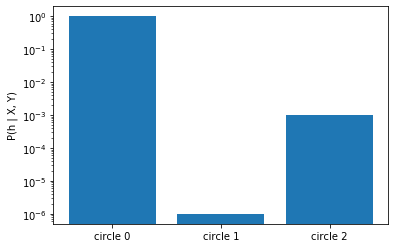

In [6]:
fig, ax = plt.subplots()
ax.bar([f"circle {i}" for i in range(len(circles))], p_h_given_xy)
ax.set_yscale("log")
ax.set_ylabel("P(h | X, Y)")

Text(0, 0.5, 'Fraction of correct predictions on training set')

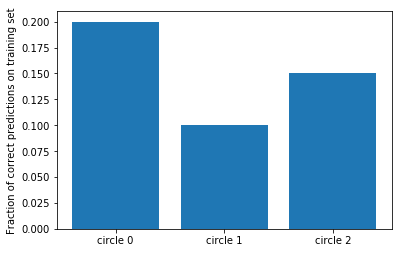

In [7]:
fig, ax = plt.subplots()
ax.bar([f"circle {i}" for i in range(len(circles))], [(y & in_circle(X, circle)).sum() / N for circle in circles])
ax.set_ylabel("Fraction of correct predictions on training set")

All the posterior mass collapsed to the classifier that predicted most training examples correct! Hence BMA is not model combination, just as Minka showed.

Try it out for $N=20, 100$.

For $N=100$, it evenly weights the two classifiers that got the same performance on training data.